## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


In [1]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
#reading the data and converting the Date column into pandas datetime object and also making it the index
df = pd.read_csv('/mnt/wanyao/hhf/mbrl/dataset/China_SSE_20210101-12h19.csv')
data = df[df['tic']=='600104.SS']
data = data[['date','open','high','low','close','volume']]
print(data)

data.index = data['date']
data.drop(['date'], axis = 1, inplace = True)
data.index = pd.to_datetime(data.index)

              date       open       high        low      close       volume
5       2000-01-05   3.205140   3.252978   3.128599   1.492836    9746109.0
9       2000-01-06   3.144545   3.348654   3.112654   1.578787   13906799.0
13      2000-01-07   3.345465   3.524060   3.345465   1.617993   35177253.0
17      2000-01-10   3.444330   3.555952   3.441141   1.649659   40907540.0
21      2000-01-11   3.476222   3.476222   3.240221   1.545613   16058361.0
...            ...        ...        ...        ...        ...          ...
105894  2020-12-25  23.820000  24.080000  23.330000  22.640020   47526612.0
105924  2020-12-28  23.480000  25.740000  23.389999  24.904022  142811960.0
105954  2020-12-29  26.049999  26.250000  23.799999  23.046379  152302220.0
105984  2020-12-30  23.850000  24.930000  23.639999  23.617218   93730875.0
106014  2020-12-31  24.530001  24.879999  24.100000  23.646244   81460429.0

[4983 rows x 6 columns]


/mnt/wanyao/hhf/gymenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data

,open,high,low,close,volume
date,,,,,
2000-01-05,3.205140,3.252978,3.128599,1.492836,9746109.0
2000-01-06,3.144545,3.348654,3.112654,1.578787,13906799.0
2000-01-07,3.345465,3.524060,3.345465,1.617993,35177253.0
2000-01-10,3.444330,3.555952,3.441141,1.649659,40907540.0
2000-01-11,3.476222,3.476222,3.240221,1.545613,16058361.0
...,...,...,...,...,...
2020-12-25,23.820000,24.080000,23.330000,22.640020,47526612.0
2020-12-28,23.480000,25.740000,23.389999,24.904022,142811960.0
2020-12-29,26.049999,26.250000,23.799999,23.046379,152302220.0


In [ ]:
data.isnull().sum() #checking if there are any null or infinite values

open      0
high      0
low       0
close     0
volume    0
dtype: int64

# Visualizing the Data

In [ ]:
data.drop([ 'open' , 'high', 'low', 'volume'], axis = 1, inplace = True)

In [ ]:
data

,close
date,
2000-01-05,1.492836
2000-01-06,1.578787
2000-01-07,1.617993
2000-01-10,1.649659
2000-01-11,1.545613
...,...
2020-12-25,22.640020
2020-12-28,24.904022
2020-12-29,23.046379


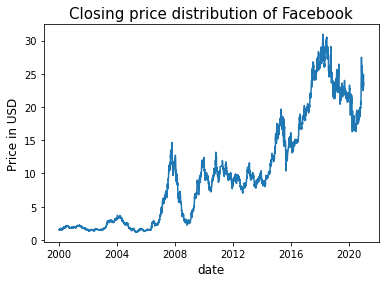

In [ ]:
plot.plot(data['close'])
plot.xlabel('date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of Facebook", fontsize=15)
plot.show()

In [ ]:
df = data['close']

# Resampling to daily frequency
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

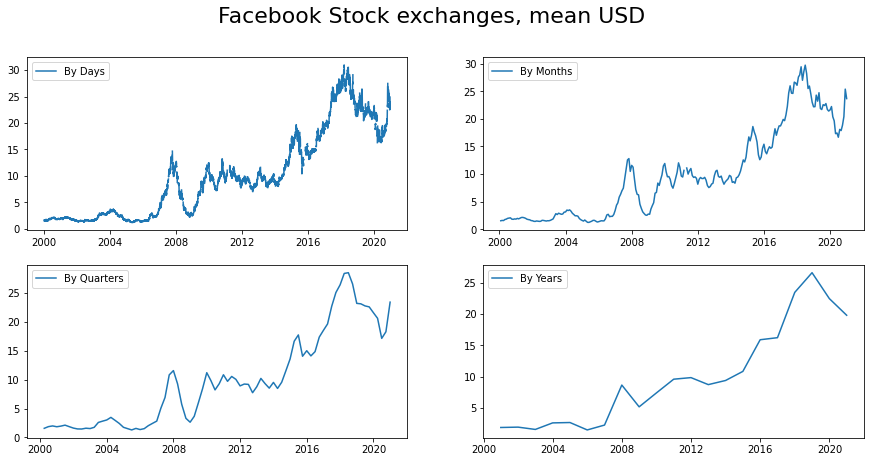

In [ ]:
# PLOTS
fig = plot.figure(figsize=[15, 7])
plot.suptitle('Facebook Stock exchanges, mean USD', fontsize=22)

plot.subplot(221)
plot.plot(df, '-', label='By Days')
plot.legend()

plot.subplot(222)
plot.plot(df_month, '-', label='By Months')
plot.legend()

plot.subplot(223)
plot.plot(df_Q, '-', label='By Quarters')
plot.legend()

plot.subplot(224)
plot.plot(df_year, '-', label='By Years')
plot.legend()

# plt.tight_layout()
plot.show()

# Checking Stationarity of the data

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=22,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationary")
            break
         else:
            print("The graph is stationary")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))

In [ ]:
df = df.fillna(method='ffill')

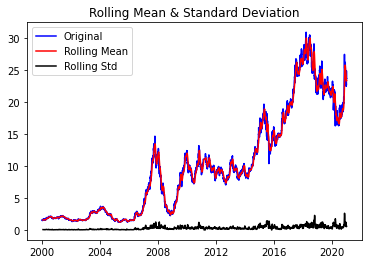

ADF Stastistic: -0.690004
p-value: 0.849322
The graph is non stationary
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [ ]:
test_stationarity(df)

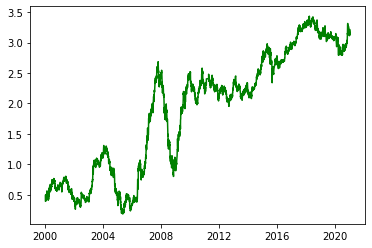

In [ ]:
ts_log = np.log(data['close'])
plot.plot(ts_log,color="green")
plot.show()

In [ ]:
data['Log transformed'] = ts_log 

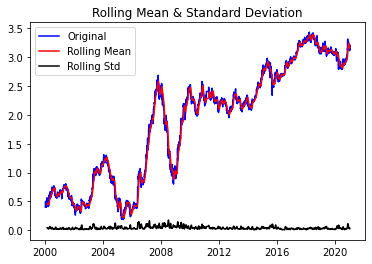

ADF Stastistic: -0.972362
p-value: 0.763211
The graph is non stationary
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [ ]:
test_stationarity(data['Log transformed'])

In [ ]:
#[1 2 3 4 5 6 7 8 9 10] - [NaN 1 2 3 4 5 6 7 8 9] = [Nan ...]

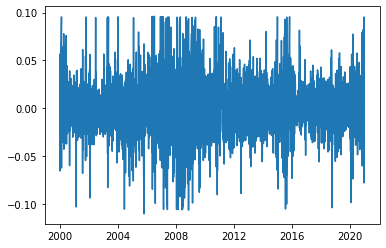

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

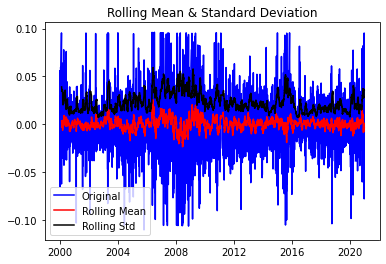

ADF Stastistic: -52.296253
p-value: 0.000000
The graph is stationary
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [ ]:
test_stationarity(ts_log_diff.dropna())

In [ ]:
data['Shifted Log transformed'] = ts_log_diff

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

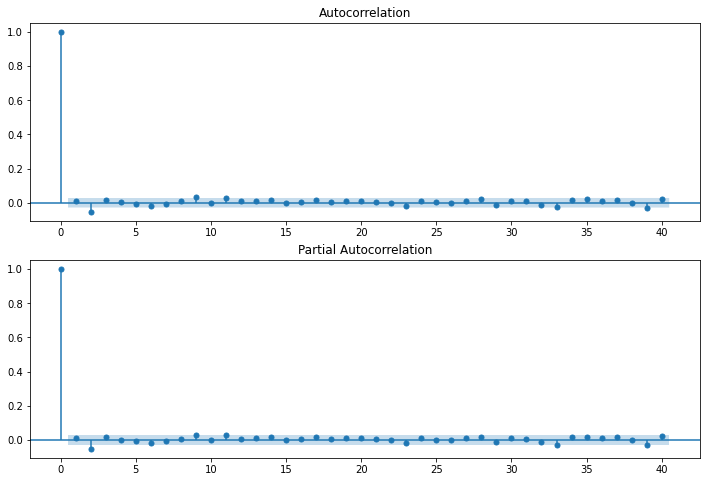

In [ ]:
fig = plot.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Shifted Log transformed'].dropna(),lags=40,ax=ax2)

# Making Predictions

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
size = int(len(ts_log)-365)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))
    model_fit = model.fit(disp=-1)
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = np.exp(pred_value)
    
    
    original_value = np.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

Printing Predicted vs Expected Values...




/mnt/wanyao/hhf/gymenv/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted = 23.508753,   expected = 23.592136,   error = 0.353437  %
predicted = 23.603249,   expected = 22.909830,   error = 3.026729  %
predicted = 22.904813,   expected = 22.944818,   error = 0.174357  %
predicted = 22.973191,   expected = 22.472452,   error = 2.228232  %
predicted = 22.460158,   expected = 22.332491,   error = 0.571667  %
predicted = 22.360263,   expected = 21.992027,   error = 1.674405  %
predicted = 21.983276,   expected = 22.258879,   error = 1.238169  %
predicted = 22.296169,   expected = 22.047237,   error = 1.129082  %
predicted = 22.035149,   expected = 22.166861,   error = 0.594181  %
predicted = 22.202053,   expected = 21.771189,   error = 1.979055  %
predicted = 21.755189,   expected = 21.817196,   error = 0.284210  %
predicted = 21.852602,   expected = 21.522741,   error = 1.532617  %
predicted = 21.509138,   expected = 21.982826,   error = 2.154811  %
predicted = 22.029105,   expected = 22.718962,   error = 3.036480  %
predicted = 22.727980,   expected 